# Face Verification

LFW Score -Labeled Faces in the Wild 

Model 1 - OpenCV -  - Just gives confidence number.

Model 2 - Open Face - https://cmusatyalab.github.io/openface/ -  LFW Score - 93.80  - Got False positive

Model 3 - Dlib -      https://github.com/davisking/dlib-      -  LFW Score - 99.38  - Able to distinguish well

# Model 1 - OpenCV

OpenCV offers some legacy techniques for face recognition. The currently available algorithms used in this package are:

1.Eigenfaces: 
    The Eigenfaces method then performs face recognition by:
        Projecting all training samples into the PCA subspace.
        Projecting the query image into the PCA subspace.
        Finding the nearest neighbor between the projected training images and the projected query image.
2.Fisherfaces:
        The Fisherfaces method learns a class-specific transformation matrix, so the they do not capture illumination 
        as obviously as the Eigenfaces method. The Discriminant Analysis instead finds the facial features 
        to discriminate between the persons. It's important to mention, that the performance of the Fisherfaces 
        heavily depends on the input data as well.
3.Local Binary Patterns Histograms :
        The basic idea of Local Binary Patterns is to summarize the local structure in an image by comparing each 
        pixel with its neighborhood. Take a pixel as center and threshold its neighbors against

For More Detailed Information: https://docs.opencv.org/3.4/da/d60/tutorial_face_main.html

OpenCV algorithms 


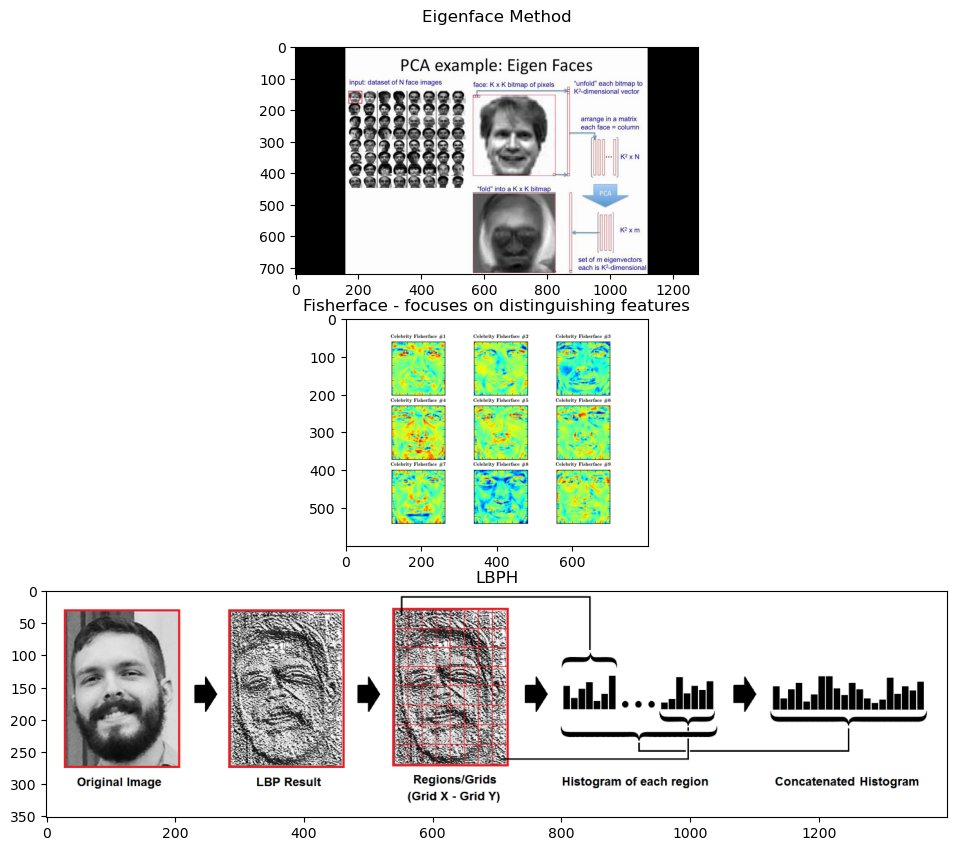

In [35]:
# How MTCNN algorithm works?
img1 = mpimg.imread('Pictures/eigenface.jpg')
img2 = mpimg.imread('Pictures/fisherface.png')
img3= mpimg.imread('Pictures/LBPH.png')


fig, ((ax1),(ax2),(ax3)) = plt.subplots(nrows=3,ncols=1,figsize=(20,10))

ax1.imshow(img1)
ax1.set_title("Eigenface Method\n")
ax2.imshow(img2)
ax2.set_title("\nFisherface - focuses on distinguishing features")
ax3.imshow(img3)
ax3.set_title("\nLBPH")
print("OpenCV algorithms ")
plt.show()

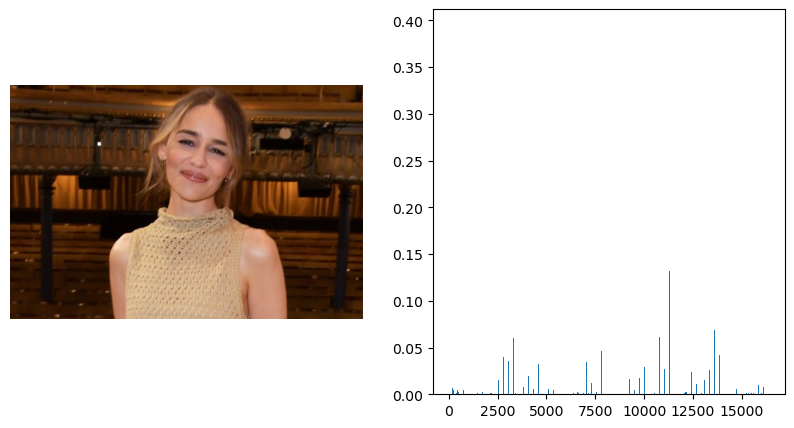

-----------------------


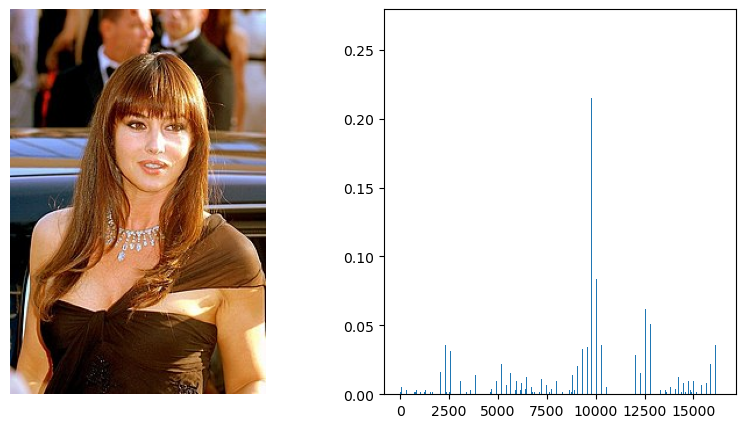

-----------------------


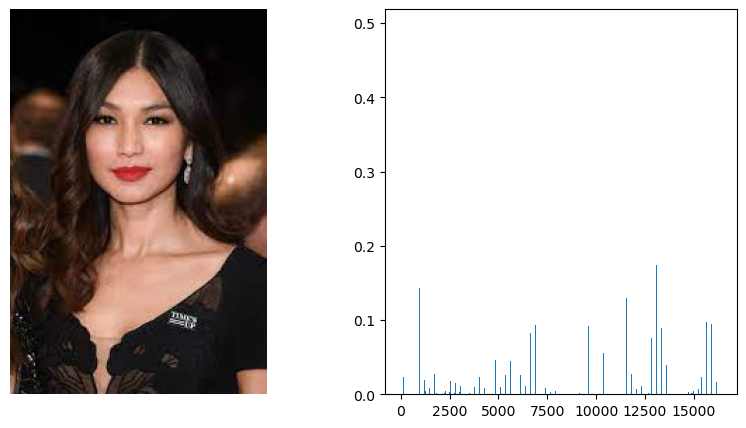

-----------------------


In [6]:
import numpy as np
import cv2 
import os
import matplotlib.pyplot as plt
import pkg_resources

installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])

is_installed = False
for installation in installed_packages_list:
    package, version = installation.split("==")
    
    if 'opencv-contrib-python' == package:
        is_installed = True
        break

if is_installed != True:
    raise ValueError("opencv-contrib-python is not installed on your environment. Please run pip install --user opencv-contrib-python command.")

opencv_home = cv2.__file__
folders = opencv_home.split(os.path.sep)[0:-1]
path = folders[0]
for folder in folders[1:]:
    path = path + "/" + folder

face_detector_path = path+"/data/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(face_detector_path);
model = cv2.face.LBPHFaceRecognizer_create() 
def detect_face(img_path):
    img = cv2.imread(img_path)
    
    detected_faces = faceCascade.detectMultiScale(img, 1.3, 5)
    x, y, w, h = detected_faces[0] #focus on the 1st face in the image
    
    img = img[y:y+h, x:x+w] #focus on the detected area
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    return img

face_db = [
    'Pictures/emilia.jpg',
    'Pictures/monica.jpg',
    'Pictures/gema.jpg'
]
faces = []
for img_path in face_db:  
    img = detect_face(img_path)
    faces.append(img)

ids = np.array([i for i in range(0, len(faces))])

pre_built_model = "pre-built-model.yml"

model.train(faces, ids)
model.save(pre_built_model)

def detect_face(img_path):
    img = cv2.imread(img_path)
    
    detected_faces = faceCascade.detectMultiScale(img, 1.3, 5)
    x, y, w, h = detected_faces[0] #focus on the 1st face in the image
    
    img = img[y:y+h, x:x+w] #focus on the detected area
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    return img

def displayHistogram(target_file):
    img = detect_face(target_file)
    tmp_model = cv2.face.LBPHFaceRecognizer_create()
    tmp_model.train([img], np.array([0]))
    
    histogram = tmp_model.getHistograms()[0][0]
    #histogram = histogram[0:100]
    axis_values = np.array([i for i in range(0, len(histogram))])
    
    plt.bar(axis_values, histogram)
    plt.show()

def findFace(target_file):
    
    img = detect_face(target_file)
    #print(img.shape)
    
    idx, confidence = model.predict(img)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(1,2,1)
    #plt.imshow(img[:,:,::-1])
    plt.imshow(cv2.imread(target_file)[:,:,::-1])
    plt.axis('off')

    ax1 = fig.add_subplot(1,2,2)
    #plt.imshow(faces[id], cmap='gray')
    plt.imshow(cv2.imread(face_db[idx])[:,:,::-1])
    plt.axis('off')

    plt.show()
    
    print("Confidence: ", round(confidence, 2))

if True:
    histograms = model.getHistograms()

    for i in range(0, len(face_db)):
        histogram = histograms[i][0]
        
        #histogram = histogram[0:100]
        
        axis_values = np.array([i for i in range(0, len(histogram))])

        fig = plt.figure(figsize=(10, 5))
        
        ax1 = fig.add_subplot(1,2,1)
        plt.imshow(cv2.imread(face_db[i])[:,:,::-1])
        plt.axis('off')
        
        ax1 = fig.add_subplot(1,2,2)
        plt.bar(axis_values, histogram)
        plt.show()
        print("-----------------------")

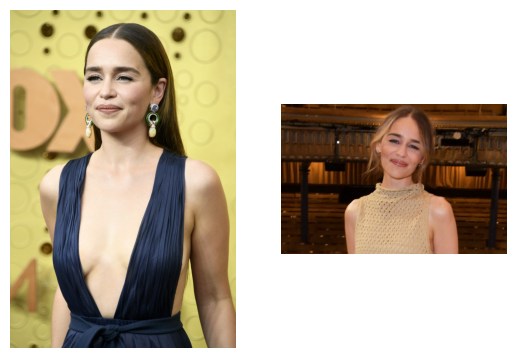

Confidence:  91.14


In [7]:

findFace('Pictures/emilia2.jpeg')

# Model 2 - openface

Openface is a deep learning facial recognition model. The model expects (96×96) RGB images as input. Its has a 128 dimensional output. The model is built on Inception Resnet V1.

Inception Resnet V1:
Deep neural networks are computationally expensive. To make it cheaper, the authors limit the number of input channels by adding an extra 1x1 convolution before the 3x3 and 5x5 convolutions. Though adding an extra operation may seem counterintuitive, 1x1 convolutions are far more cheaper than 5x5 convolutions, and the reduced number of input channels also help. Do note that however, the 1x1 convolution is introduced after the max pooling layer, rather than before.

Using the dimension reduced inception module, a neural network architecture was built. This was popularly known as GoogLeNet (Inception v1). 

For More Information on CNN Inception Resnet architecture: https://iq.opengenus.org/inception-resnet-v1/

Openface 


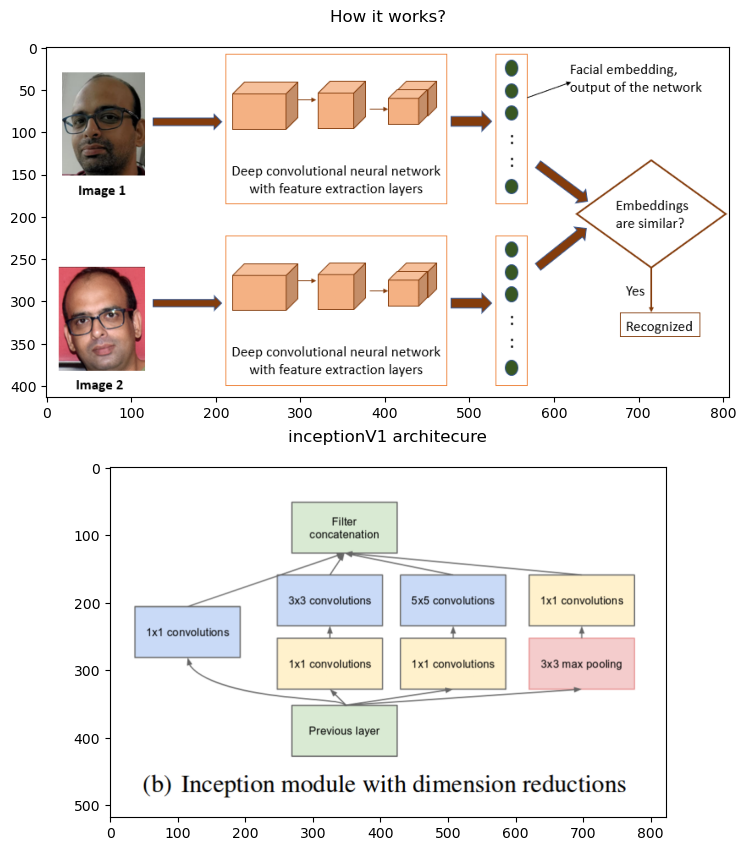

In [37]:
# How MTCNN algorithm works?
img1 = mpimg.imread('Pictures/openface.png')
img2 = mpimg.imread('Pictures/inceptionV1.png')


fig, ((ax1),(ax2)) = plt.subplots(nrows=2,ncols=1,figsize=(20,10))

ax1.imshow(img1)
ax1.set_title("How it works?\n")
ax2.imshow(img2)
ax2.set_title("inceptionV1 architecure\n")

print("Openface ")
plt.show()

Model 2 - Openface

1/1 [==============================] - 0s 39ms/step

comparing emilia and emilia1
Cosine distance:  0.011847615242004395
Euclidean distance:  0.15393241
Euclidean distance - l2 form:  1.0000000062822012
these are same

comparing emilia and emilia2
Cosine distance:  0.010037124156951904
Euclidean distance:  0.14168398
Euclidean distance - l2 form:  0.9999999915898009
these are same

comparing emilia1 and emilia2
Cosine distance:  0.0026760101318359375
Euclidean distance:  0.073158555
Euclidean distance - l2 form:  1.000000018562115
these are same


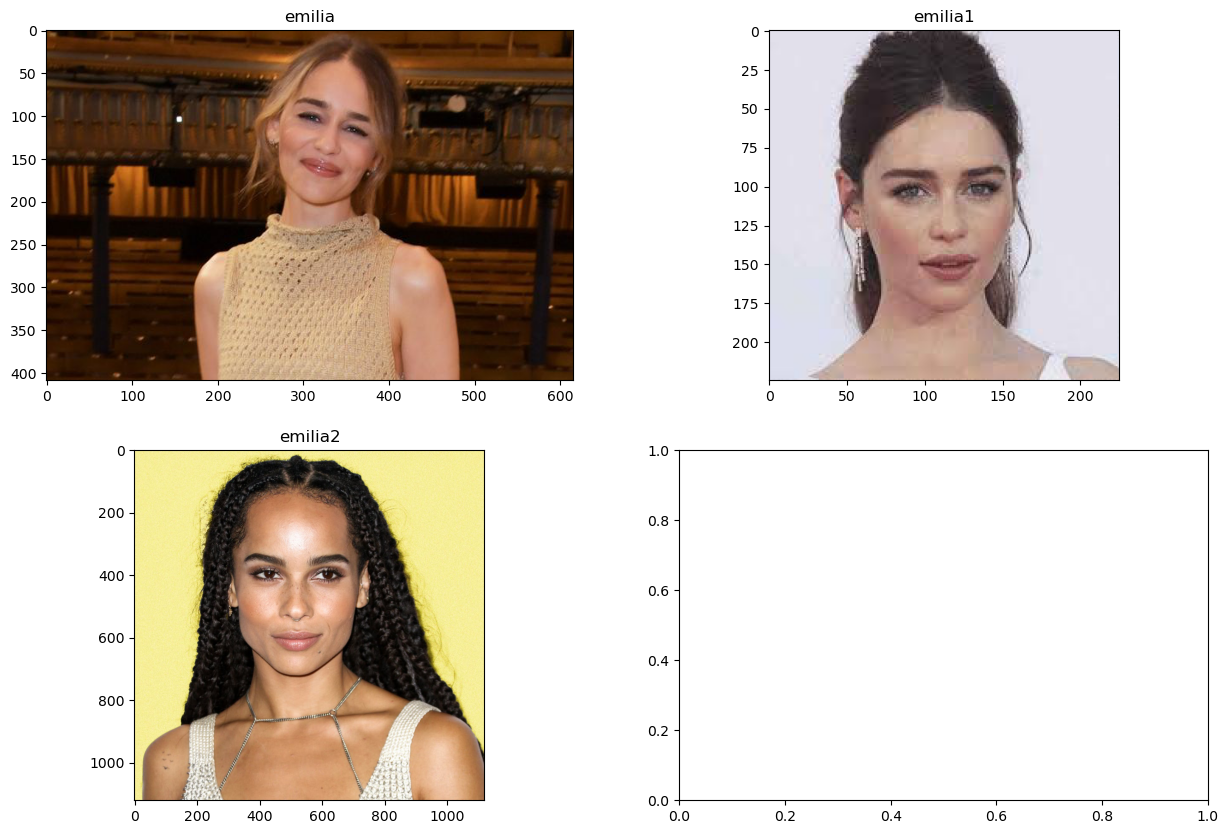

In [34]:
from modelopenface import *
import matplotlib.image as mpimg


print("Model 2 - Openface\n")


p1 = 'Pictures/emilia.jpg'
p2 = 'Pictures/emilia1.jpg'
p3 = 'Pictures/emilia2.jpg'

img1 = mpimg.imread(p1)
img2 = mpimg.imread(p2)
img3 = mpimg.imread(p3)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax1.imshow(img1)
ax1.set_title("emilia")
ax2.imshow(img2)
ax2.set_title("emilia1")
ax3.imshow(img3)
ax3.set_title("emilia2")

img1_representation = model.predict(preprocess_image(p1))[0,:]
img2_representation = model.predict(preprocess_image(p2))[0,:]
img3_representation = model.predict(preprocess_image(p3))[0,:]

print("\ncomparing emilia and emilia1")
print("Cosine distance: ",findCosineDistance(img1_representation, img2_representation))
print("Euclidean distance: ",findEuclideanDistance(img1_representation, img2_representation))
print("Euclidean distance - l2 form: ",l2_normalize(findEuclideanDistance(img1_representation, img2_representation)))

if findCosineDistance(img1_representation, img2_representation) < 0.02:
    print("these are same")
else:
    print("these are different")

print("\ncomparing emilia and emilia2")
print("Cosine distance: ",findCosineDistance(img1_representation, img3_representation))
print("Euclidean distance: ",findEuclideanDistance(img1_representation, img3_representation))
print("Euclidean distance - l2 form: ",l2_normalize(findEuclideanDistance(img1_representation, img3_representation)))

if findCosineDistance(img1_representation, img3_representation) < 0.02:
    print("these are same")
else:
    print("these are different")

    
print("\ncomparing emilia1 and emilia2")
print("Cosine distance: ",findCosineDistance(img2_representation, img3_representation))
print("Euclidean distance: ",findEuclideanDistance(img2_representation, img3_representation))
print("Euclidean distance - l2 form: ",l2_normalize(findEuclideanDistance(img2_representation, img3_representation)))

if findCosineDistance(img2_representation, img3_representation) < 0.02:
    print("these are same")
else:
    print("these are different")

# Model 3 - Dlib

A modern face recognition pipeline consists of 4 common stages: detect, align, represent and verify. Supportively, all of those stages are covered in dlib’s implementation.

Dlib is mainly inspired from a ResNet-34 model. Davis E. King modified the regular ResNet structure and dropped some layers and re-build a neural networks consisting of 29 convolution layers. It expexts 150x150x3 sized inputs and represent face images as 128 dimensional vectors.

First you have a convolutional layer with 64 filters and kernel size of 7x7 (conv1 in your table) followed by a max pooling layer. Note that the stride is specified to be stride = 2 in both cases.

Next, in conv2_x you have the mentioned pooling layer and the following convolution layers. Here the layers are normally grouped in pairs (trios in bigger architectures) because is how the residuals are connected (the arrows jumping each two layers). The first matrix:

      [3x3,3x3,6464]∗3          
            
            
means that you have 2 layers of kernel_size = 3x3, num_filters = 64 and these are repeated x3. These correspond to the layers between pool,/2 and the filter 128 ones, 6 layers in total (one pair times 3).

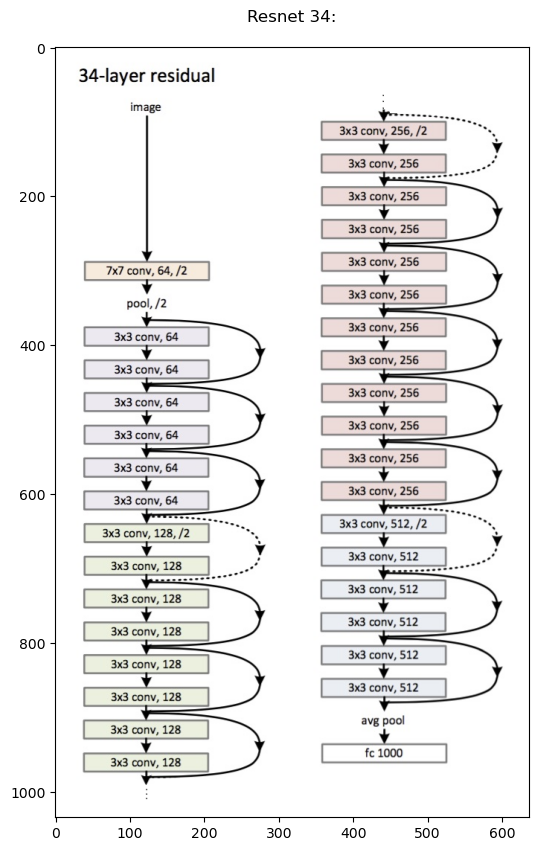

In [39]:
# How MTCNN algorithm works?
img1 = mpimg.imread('Pictures/resnet.png')

fig, ((ax1)) = plt.subplots(nrows=1,ncols=1,figsize=(20,10))

ax1.imshow(img1)
ax1.set_title("Resnet 34:\n")

plt.show()

Deteted and aligned faces:


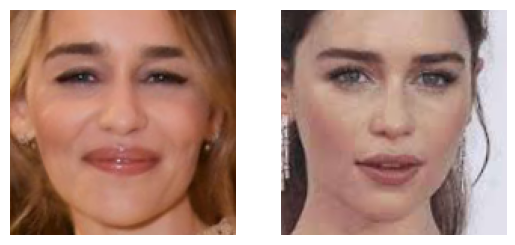

Distance is  0.5228763678982765  whereas threshold is  0.6
Pictures/emilia.jpg  and  Pictures/emilia1.jpg  are same person
Deteted and aligned faces:


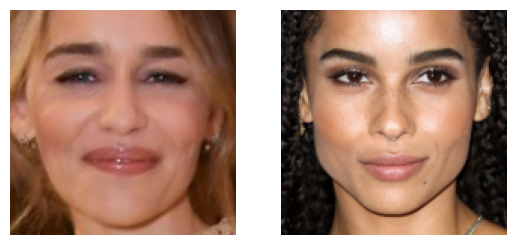

Distance is  0.7041189025221773  whereas threshold is  0.6
Pictures/emilia.jpg  and  Pictures/emilia2.jpg  are different person


False

In [9]:
from modelDlib import *

verify('Pictures/emilia.jpg', 'Pictures/emilia1.jpg')
verify('Pictures/emilia.jpg', 'Pictures/emilia2.jpg')